# Density and Contour Plots

- Use case: displaying 3D data in two dimensions using contours or color-coded regions.
- There are three applicable Matplotlib functions: ``plt.contour`` for contour plots, ``plt.contourf`` for filled contour plots, and ``plt.imshow`` for showing images.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

### 3D Functions

- Create a contour plot using a function $z = f(x, y)$, using the following particular choice for $f$.

In [2]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

- A contour plot can be created with the ``plt.contour`` function.
- It takes three arguments: a grid of *x* values, a grid of *y* values, and a grid of *z* values. The *x* and *y* values represent positions on the plot, and the *z* values will be represented by the contour levels.
- Prepare the data using ``np.meshgrid``, which builds 2D grids from 1D arrays.

In [3]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

Now let's look at this with a standard line-only contour plot:

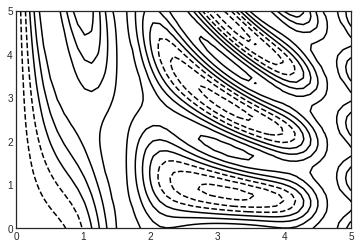

In [4]:
plt.contour(X, Y, Z, colors='black');

- When a single color is used, negative values are shown with dashed lines, and positive values by solid lines.
- Lines can be color-coded by specifying a colormap with the ``cmap`` argument.
- Let's also specify that we want more lines to be drawn—20 equally spaced intervals within the data range:

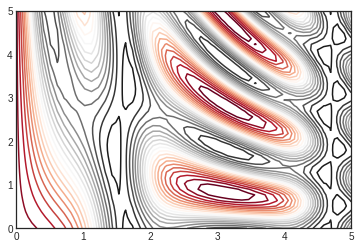

In [5]:
plt.contour(X, Y, Z, 20, cmap='RdGy');

- Here we chose the ``RdGy`` (short for *Red-Gray*) colormap = good choice for centered data.
- Matplotlib has a wide range of colormaps available, which you can easily browse in IPython by doing a tab completion on the ``plt.cm`` module:
```
plt.cm.<TAB>
```

- The line spacing may be a bit distracting. Improve by switching to a filled contour plot using the ``plt.contourf()`` function (notice the ``f`` at the end).
- Add a ``plt.colorbar()`` command, which creates a axis with labeled color information.

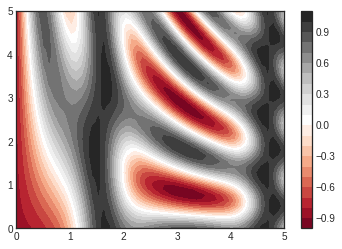

In [6]:
plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar();

- The colorbar indicates that the black regions are "peaks" and red regions are "valleys."
- One potential issue with this plot is that it is a bit "splotchy." That is, the color steps are discrete rather than continuous.
- This could be remedied by setting the #contours to a high number, but this results in an inefficient plot: Matplotlib must render a new polygon for each step.
- A better way to handle this is to use the ``plt.imshow()`` function, which interprets a two-dimensional grid of data as an image.

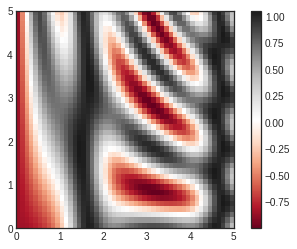

In [8]:
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower', cmap='RdGy')
plt.colorbar()
plt.axis(aspect='image');

There are a few potential gotchas with ``imshow()``, however:

- ``plt.imshow()`` doesn't accept an *x* and *y* grid, so you must manually specify the *extent* [*xmin*, *xmax*, *ymin*, *ymax*] of the image on the plot.
- ``plt.imshow()`` by default follows the standard image array definition where the origin is in the upper left, not in the lower left as in most contour plots. This must be changed when showing gridded data.
- ``plt.imshow()`` will automatically adjust the axis aspect ratio to match the input data; this can be changed by setting, for example, ``plt.axis(aspect='image')`` to make *x* and *y* units match.

- Sometimes you may want to combine contour plots and image plots.
- Let's use a partially transparent background image (with transparency set via the ``alpha`` parameter) and overplot contours with labels on the contours (using the ``plt.clabel()`` function):

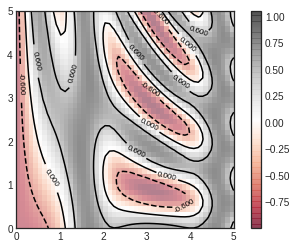

In [9]:
contours = plt.contour(X, Y, Z, 3, colors='black')
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='RdGy', alpha=0.5)
plt.colorbar();